In [1]:
import torch
import espaloma as esp

Using backend: pytorch


In [2]:
ds = esp.data.dataset.GraphDataset.load("zinc_param")

In [5]:
# define a layer
layer = esp.nn.layers.dgl_legacy.gn("SAGEConv")

# define a representation
representation = esp.nn.Sequential(
        layer,
        [128, "relu", 128, "relu", 128, "relu"],
)

# define a readout
readout = esp.nn.readout.node_typing.NodeTyping(
        in_features=128,
        n_classes=100
) # not too many elements here I think?

net = torch.nn.Sequential(
    representation,
    readout
)

In [11]:
net.load_state_dict(
    torch.load(
        "results/net1300.th"
    )
)

<All keys matched successfully>

In [12]:
g = next(iter(ds.view(batch_size=len(ds))))

/Users/wangy1/anaconda3/envs/esp/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: From v0.5, DGLHeteroGraph is merged into DGLGraph. You can safely replace dgl.batch_hetero with dgl.batch
  return warnings.warn(message, category=category, stacklevel=1)


In [14]:
g = net(g)

In [133]:
y_pred = g.nodes['n1'].data['nn_typing'].argmax(dim=-1)
y_true = g.nodes['n1'].data['legacy_typing']

In [134]:
(y_true == y_pred).sum()

tensor(21602)

In [131]:
errors = []
for _g in ds:
    net(_g.heterograph)
    y_pred = _g.nodes['n1'].data['nn_typing'].argmax(dim=-1)
    y_true = _g.nodes['n1'].data['legacy_typing']
    errors.append((y_pred != y_true).sum().item())

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4, 2))
labels, counts = np.unique(errors, return_counts=True)

<Figure size 288x144 with 0 Axes>

In [54]:
_counts = np.array([counts[0], counts[1], sum(counts[2:])])

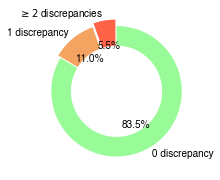

In [277]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
_, _, autopcts = plt.pie(_counts[::-1], labels=["0 discrepancy", "1 discrepancy", "$\geq 2$ discrepancies"][::-1], autopct='%1.1f%%', startangle=90, 
        colors=['tomato', 'sandybrown', 'palegreen'],
       explode=(0.1, 0.05, 0.0))

circle = plt.Circle((0, 0), 0.70, fc="white")
fig=plt.gcf()
fig.gca().add_artist(circle)
plt.setp(autopcts, **{'weight':'bold'})
plt.savefig("pie.png", dpi=300)

In [138]:
pairs = torch.stack([y_true, y_pred], dim=-1)
pairs = pairs[pairs[:, 0] != pairs[:, -1]]

tensor([[ 5,  4],
        [ 5,  4],
        [ 8,  9],
        [ 2,  6],
        [ 2,  0],
        [ 6,  0],
        [40, 41],
        [ 7,  6],
        [ 6,  7],
        [33, 39],
        [42, 37],
        [41, 40],
        [34, 11],
        [ 2,  6],
        [ 6,  4],
        [ 6,  4],
        [ 6,  4],
        [ 6,  4],
        [ 6,  4],
        [ 6,  4],
        [ 0,  6],
        [ 4,  5],
        [ 4,  5],
        [ 7,  2],
        [ 0,  6],
        [ 6,  0],
        [ 2,  6],
        [ 7,  6],
        [ 7,  6],
        [ 2,  6],
        [ 7,  6],
        [ 4,  5],
        [40, 41],
        [ 4,  5],
        [ 6,  2],
        [41, 40],
        [ 6,  7],
        [ 6,  0],
        [27, 15],
        [27, 15],
        [ 9,  8],
        [ 6,  2],
        [41, 40],
        [ 2,  0],
        [ 7,  0],
        [ 7,  2],
        [ 7,  6],
        [ 6,  0],
        [ 5,  4],
        [ 5,  4],
        [40, 39],
        [ 6,  0],
        [ 5,  4],
        [ 5,  4],
        [ 4,  5],
        [ 

In [186]:
unique_pairs, counts = torch.unique(pairs, dim=0, return_counts=True, )
idxs = counts.argsort(dim=0, descending=True)
counts = counts[idxs]
unique_pairs = unique_pairs[idxs]



unique_pairs = [(idx_2_str[pair[0].item()], idx_2_str[pair[1].item()]) for pair in unique_pairs]
unique_pairs = unique_pairs[:7]
unique_pairs = [pair[0] + r"$\rightarrow$" + pair[1] for pair in unique_pairs]
unique_pairs.append("others")

tensor([[ 0,  2],
        [ 0,  4],
        [ 0,  6],
        [ 0,  7],
        [ 2,  0],
        [ 2,  6],
        [ 2,  7],
        [ 3, 11],
        [ 4,  0],
        [ 4,  5],
        [ 4,  6],
        [ 5,  4],
        [ 6,  0],
        [ 6,  2],
        [ 6,  4],
        [ 6,  7],
        [ 7,  0],
        [ 7,  2],
        [ 7,  6],
        [ 8,  9],
        [ 9,  8],
        [15, 27],
        [27, 15],
        [31, 30],
        [33, 39],
        [34, 11],
        [34, 40],
        [34, 45],
        [37, 42],
        [38, 39],
        [39, 38],
        [40, 39],
        [40, 41],
        [41, 39],
        [41, 40],
        [42, 37],
        [70, 76],
        [75, 72],
        [76, 70]])


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

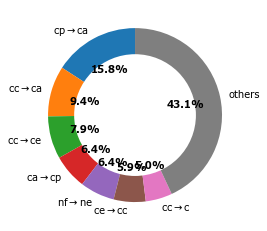

In [184]:
_, _, autopcts = plt.pie(counts, labels=unique_pairs, startangle=90, autopct='%1.1f%%')

circle = plt.Circle((0, 0), 0.70, fc="white")
fig=plt.gcf()
fig.gca().add_artist(circle)
plt.setp(autopcts, **{'weight':'bold'})


In [233]:
pairs = torch.stack([y_true, y_pred], dim=-1)
# pairs = pairs[pairs[:, 0] != pairs[:, -1]]
pairs = [(idx_2_str[pair[0].item()], idx_2_str[pair[1].item()]) for pair in pairs]

In [240]:
wrong_count = {
    "C": 0,
    "H": 0,
    "O": 0,
    "N": 0,
    "S": 0,
}

all_count = {
    "C": 0,
    "H": 0,
    "O": 0,
    "N": 0,
    "S": 0,
}


for x, y in pairs:
    if any(
        [x.startswith(element.lower()) for element in wrong_count.keys()]
    ):
        all_count[x[0].upper()] += 1
        if x != y:
            wrong_count[x[0].upper()] += 1

error_rate = {
    element: wrong_count[element] / all_count[element] for element in all_count.keys()
}

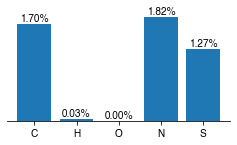

In [275]:
fig, ax = plt.subplots(figsize=(4, 2))

ax.bar(
    error_rate.keys(),
    error_rate.values(),
)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (x + width/2, y + height + 0.0005), ha='center', weight='bold')
    
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

plt.savefig("bar.png", dpi=300)

In [239]:
wrong_count

{'C': 156, 'H': 3, 'O': 0, 'N': 38, 'S': 4}

In [273]:
plt.rcParams["font.family"] = "Helvetica"

ValueError: 'explode' must be of length 'x'

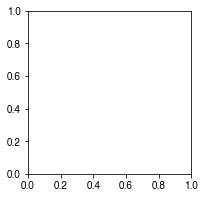

In [274]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('tab20')

plt.figure(figsize=(3, 3))

_, _, autopcts = plt.pie(
    element_count.values(),
    labels=element_count.keys(),
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.0, 0.05, 0.1, 0.125, 0.25),
    colors=(cmap(1), cmap(2), cmap(3), cmap(4), cmap(5),),
    counterclock=False,
)

circle = plt.Circle((0, 0), 0.70, fc="white")
fig=plt.gcf()
fig.gca().add_artist(circle)
plt.setp(autopcts, **{'weight':'bold'})
plt.tight_layout()
plt.savefig("pie_element.png", dpi=300)

In [225]:
import matplotlib.font_manager as font_manager

font_dirs = ['/Users/wangy1/Library/Fonts/Linotype - Neue Kabel Book.ttf', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)


/Users/wangy1/anaconda3/envs/esp/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """


In [226]:
font_manager.fontManager.ttflist

[<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>,
 <Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>,
 <Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>,
 <Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) norma

In [220]:
def analyze(g):
    print(g.mol.to_smiles())
    net(g.heterograph)
    y_pred = g.nodes['n1'].data['nn_typing'].argmax(dim=-1).detach().numpy()
    y_true = g.nodes['n1'].data['legacy_typing'].detach().numpy()
    print((y_pred != y_true).sum())
    y_pred = [idx_2_str[_y] for _y in y_pred]
    y_true = [idx_2_str[_y] for _y in y_true]
    print(y_true)
    print(y_pred)
    print()

In [117]:
idx_2_str = esp.graphs.legacy_force_field.LegacyForceField("gaff-1.81")._idx_2_str




In [130]:
analyze(ds[463])


[H][c]1[c]([H])[c]2[c]3[c]([c]1[H])[c]([H])[c]([H])[c]1[c]([H])[c]([H])[c]([H])[c]([c]13)[C]2([H])[H]
4
['ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'ca', 'c3', 'ha', 'ha', 'ha', 'ha', 'ha', 'ha', 'ha', 'ha', 'hc', 'hc']
['ca', 'ca', 'cp', 'ca', 'ca', 'cp', 'ca', 'ca', 'ca', 'ca', 'cp', 'cp', 'ca', 'ca', 'c3', 'ha', 'ha', 'ha', 'ha', 'ha', 'ha', 'ha', 'ha', 'hc', 'hc']

